In [1]:
import sys
import os
import pandas as pd
import seaborn as sns

# Add the path to the sys.path
path = '/home/lexi/WeatherValidation/WeatherValidation/'
if path not in sys.path:
    sys.path.append(path)
from duplexity.deterministic_score import *
from duplexity.metric_map import grid_point_calculate,plot_metrics_map

from datetime import datetime, timedelta
import time
import numpy as np
import tqdm

import matplotlib.pyplot as plt



### Load raw data

In [2]:
# Define the directory containing the .npz files
data_dir = "/mnt/local/ERA5_example/"
# Get all .npz files in the directory
file_list = [os.path.join(data_dir, f) for f in os.listdir(data_dir) if f.endswith('.npy')]
m = len(file_list)
print(f"Number of files found: {m}")


Number of files found: 3600


In [3]:
# Initialize lists to store observed and output data
observed_list = []
output_list = []

# Load data from each file
for file in file_list:
    observed = np.load(file)
    output = observed + np.random.normal(0, 0.1, observed.shape)
    observed_list.append(observed)
    output_list.append(output)

# Convert lists to numpy arrays
observed_data = np.array(observed_list)
output_data = np.array(output_list)

print(f"Loaded observed data shape: {observed_data.shape}")
print(f"Loaded output data shape: {output_data.shape}")


Loaded observed data shape: (3600, 192, 144)
Loaded output data shape: (3600, 192, 144)


In [4]:
# Continuous Metrics
continuous_metrics = calculate_continuous_metrics(observed_data, output_data)

for metric, value in continuous_metrics.items():
    print(f"{metric}: {value}")


MAE: 0.07978983930158182
MSE: 0.00999984694680979
RMSE: 0.09999923473112077
Bias: -2.449929473868131e-05
DRMSE: 0.09999923173002066
Pearson Correlation: 0.9040008513378118


In [5]:
# Set a threshold for binary classification
threshold = 0.5

# Generate binary example data for categorical metrics
observed_binary = (observed > threshold).astype(int)
output_binary = (output > threshold).astype(int)

# Categorical Metrics
categorical_metrics = calculate_categorical_metrics(observed_binary, output_binary, threshold)

for metric, value in categorical_metrics.items():
    if isinstance(value, np.ndarray):
        print(f"{metric}: \n{value}")
    else:
        print(f"{metric}: {value:.4f}")


Confusion Matrix: 
[[    2     1]
 [    2 27643]]
Precision: 0.5000
Recall: 0.6667
F1 Score: 0.5714
Accuracy: 0.9999
CSI: 0.4000
ETS: 0.3999
FAR: 0.5000
POD: 0.6667
GSS: 0.3999
HSS: 0.5714
PSS: 0.6666
SEDI: 0.9265



Confusion Matrix:
[[    2     1]
 [    2 27643]]


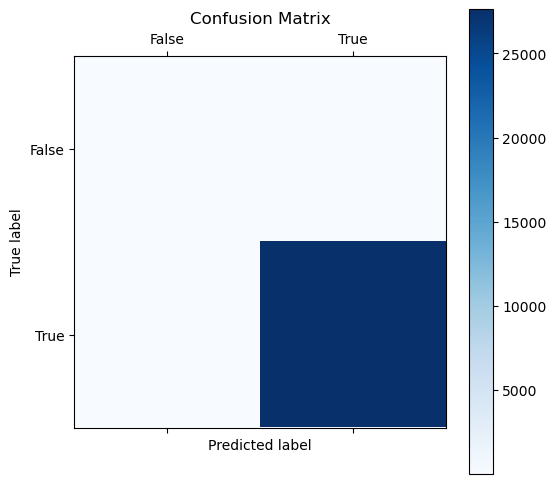

In [10]:
# Calculate and display confusion matrix
cm = confusion_matrix(observed_binary, output_binary, threshold)
print("\nConfusion Matrix:")
print(cm)
# Plot Confusion Matrix
plt.figure(figsize=(6, 6))
plt.matshow(cm, cmap=plt.cm.Blues, fignum=1)
plt.title('Confusion Matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.xticks([0, 1], ['False', 'True'])
plt.yticks([0, 1], ['False', 'True'])
plt.show()


### Metric map

In [11]:
metrics = grid_point_calculate(observed_list, output_list)


In [ ]:
plot_metrics_map(metrics, metric_name: str, title: str, save_path: str = None, vminvmax: tuple = None, camp: str = 'viridis', land_mask: np.array = None)


SyntaxError: invalid syntax (3266633815.py, line 1)